In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("/home/deependra/Downloads/1645792390_cep1_dataset.xlsx",engine='openpyxl')

In [3]:
type(df)

pandas.core.frame.DataFrame

#### 1.a. Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### All the column is in numeric form with DataType = int or float.

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### No null values in the dataset

In [8]:
duplicates = df[df.duplicated()]

In [9]:
duplicates

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


#### 1.b. Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


##### 2.a. Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### As we can see that the data in each column is having very different scale.

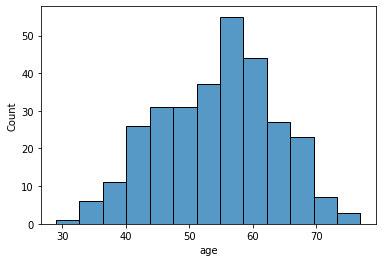

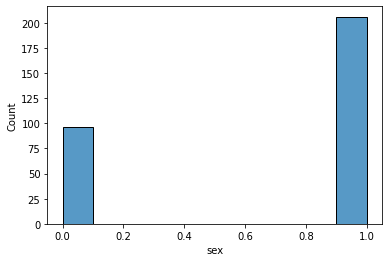

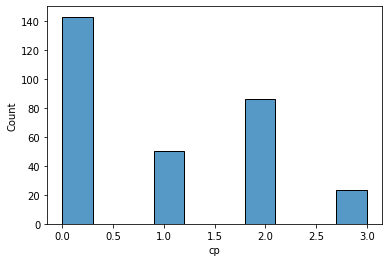

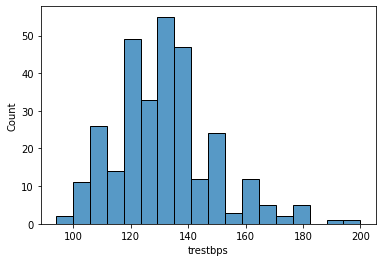

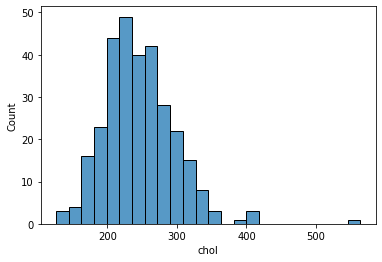

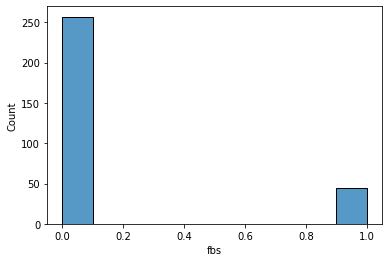

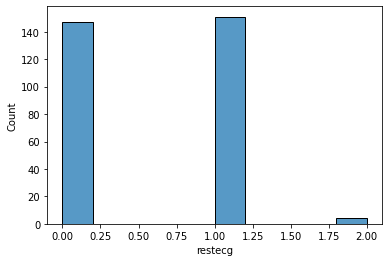

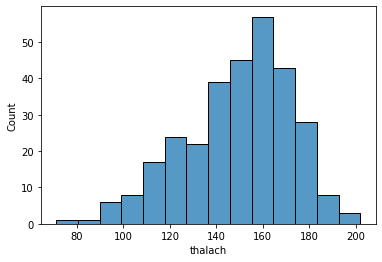

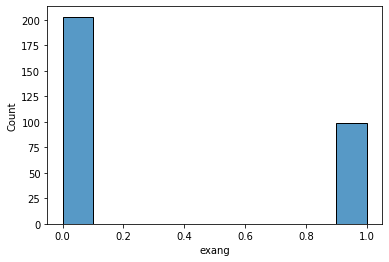

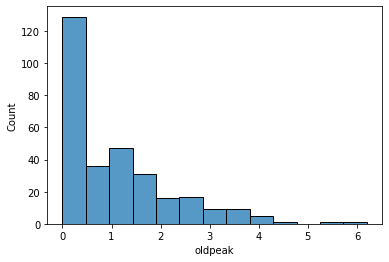

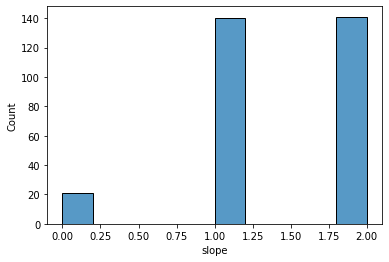

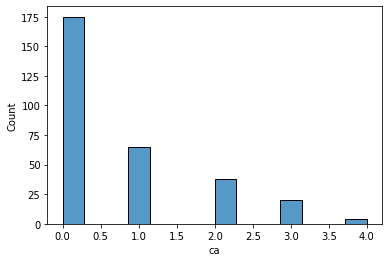

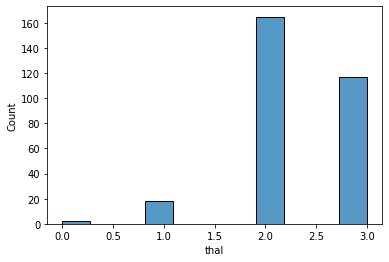

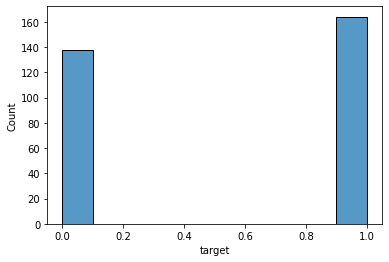

In [13]:
for i in df.columns:
    sns.histplot(df[i])
    plt.show()

#### From here we can see that the distribution is not normal and skewed 

/home/deependra/Desktop/End_to_End_ML_Project/Healthcare_CVD/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


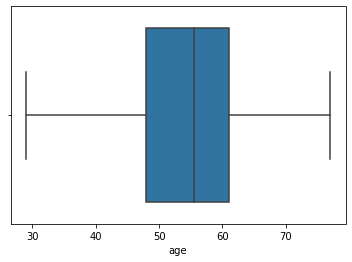

/home/deependra/Desktop/End_to_End_ML_Project/Healthcare_CVD/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


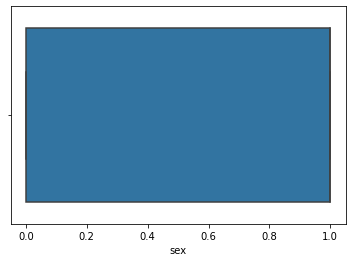

/home/deependra/Desktop/End_to_End_ML_Project/Healthcare_CVD/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


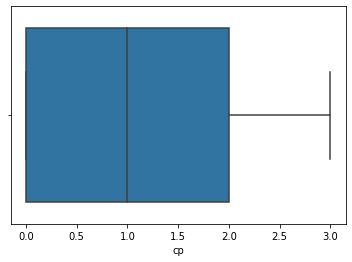

/home/deependra/Desktop/End_to_End_ML_Project/Healthcare_CVD/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


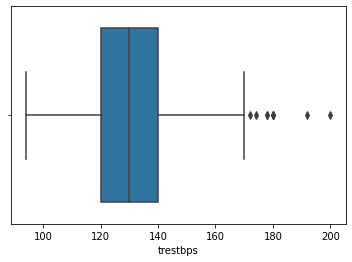

/home/deependra/Desktop/End_to_End_ML_Project/Healthcare_CVD/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


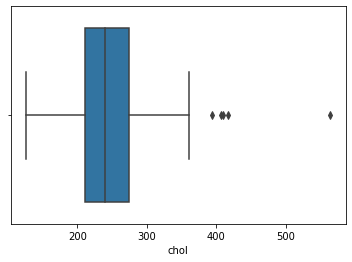

/home/deependra/Desktop/End_to_End_ML_Project/Healthcare_CVD/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


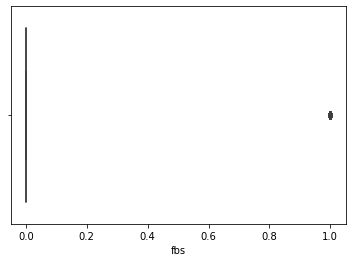

/home/deependra/Desktop/End_to_End_ML_Project/Healthcare_CVD/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


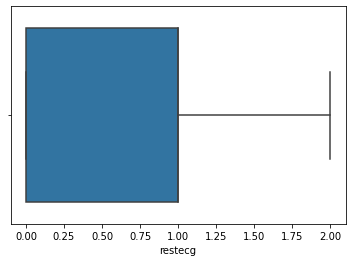

/home/deependra/Desktop/End_to_End_ML_Project/Healthcare_CVD/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


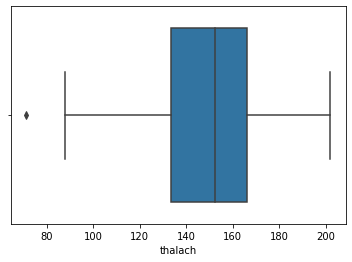

/home/deependra/Desktop/End_to_End_ML_Project/Healthcare_CVD/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


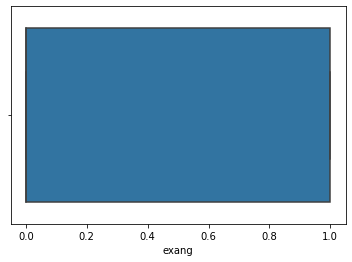

/home/deependra/Desktop/End_to_End_ML_Project/Healthcare_CVD/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


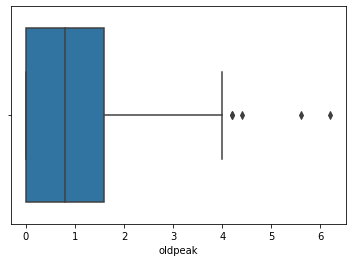

/home/deependra/Desktop/End_to_End_ML_Project/Healthcare_CVD/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


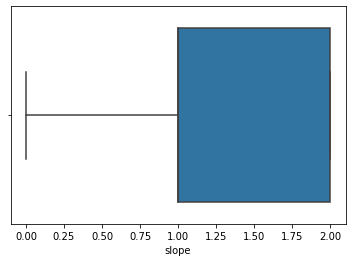

/home/deependra/Desktop/End_to_End_ML_Project/Healthcare_CVD/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


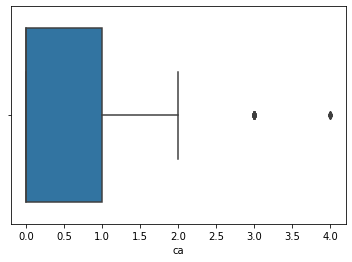

/home/deependra/Desktop/End_to_End_ML_Project/Healthcare_CVD/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


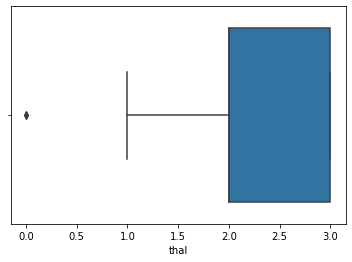

/home/deependra/Desktop/End_to_End_ML_Project/Healthcare_CVD/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


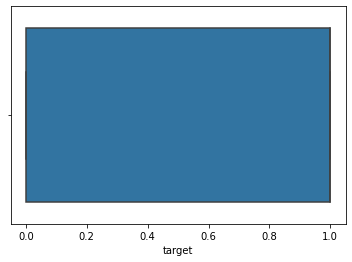

In [14]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

As the number of rows is very less in the dataset, so removing the outliers may affect the dataset. So, we will treat the outliers as potential observations.

#### 2. b. Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 

As we can see that all the columns is numerical not the categorical.

#### 2.c.Study the occurrence of CVD across the Age category

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
df["target"].unique()

array([1, 0])

In [17]:
new_age = df[(df["age"])&(df["target"]==1)]

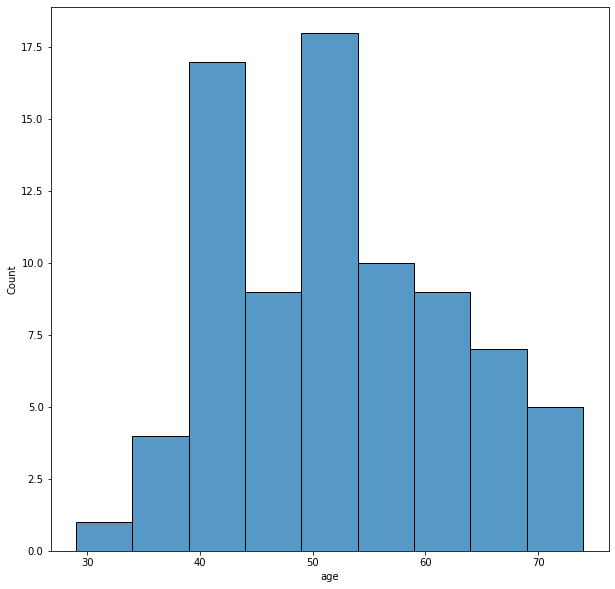

In [18]:
plt.figure(figsize=(10,10))
sns.histplot(new_age["age"], binwidth=5)
plt.show()

So the age between 48-54 is having maximum number of CVD cases

#### 2. d. Study the composition of all patients with respect to the Sex category

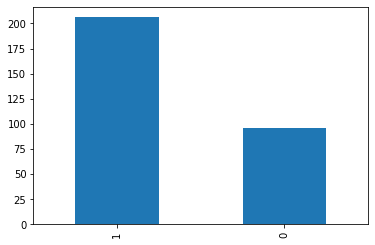

In [19]:
df["sex"].value_counts().plot(kind = "bar")
plt.show()

Here, 1 = Male and 0  = Female. 
So there is an imbalance in the data of the Sex category. 

#### 2.e. Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

In [20]:
df[(df["trestbps"])&(df["target"]==1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2,1
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2,1
34,51,1,3,125,213,0,0,125,1,1.4,2,1,2,1
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2,1
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2,1
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2,1
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2,1
63,41,1,1,135,203,0,1,132,0,0.0,1,0,1,1


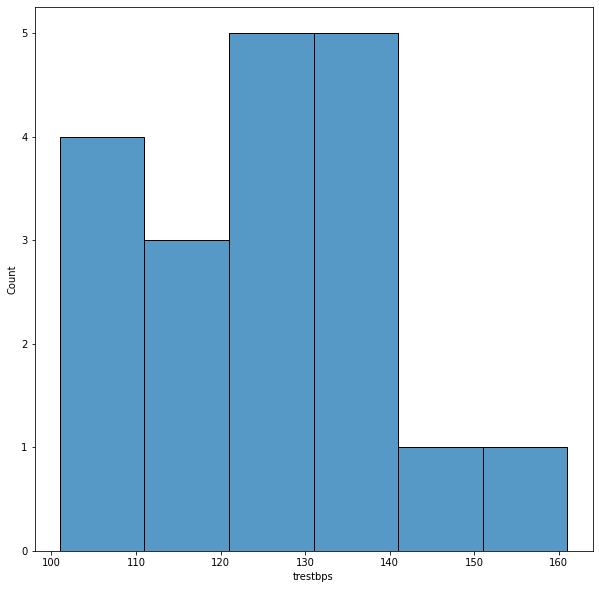

In [21]:
plt.figure(figsize=(10,10))
sns.histplot(df[(df["trestbps"])&(df["target"]==1)]["trestbps"],binwidth=10)
plt.show()

Here we can see that, the BP between 122 to 132 is having more chance to have the CDV

#### 2.f. Describe the relationship between cholesterol levels and a target variable

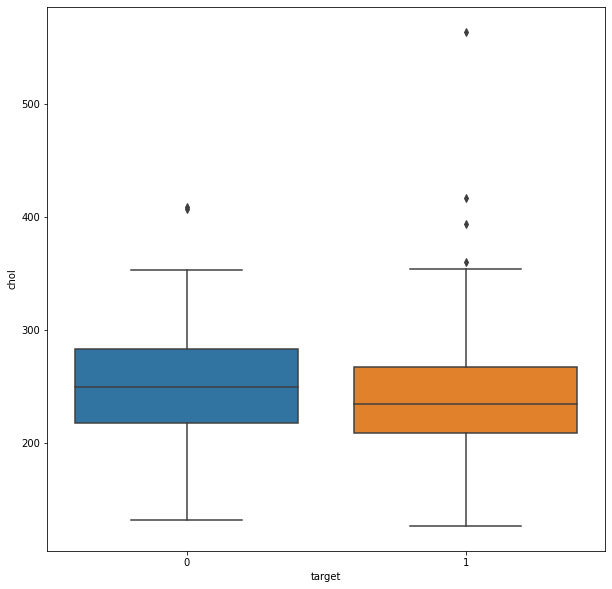

In [22]:
plt.figure(figsize=(10,10))
sns.boxplot(y = df["chol"],x = df["target"])
plt.show()

#### 2. g. State what relationship exists between peak exercising and the occurrence of a heart attack

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
df[(df["exang"])&(df["target"]==1)][["exang","target"]].value_counts()

exang  target
1      1         23
dtype: int64

So, when there is peak exercising, the CSD is having 100% probability

#### 2.h. Check if thalassemia is a major cause of CVD

<AxesSubplot:xlabel='thal'>

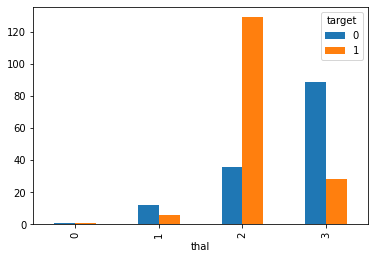

In [25]:
pd.crosstab(df["thal"],df["target"]).plot(kind = "bar")

So if the thal = 2, then there is high chance of Heart attack

#### 2.i. List how the other factors determine the occurrence of CVD

In [26]:
corr = df[["cp","fbs","restecg","thalach","oldpeak","slope","ca","target"]].corr()

/home/deependra/Desktop/End_to_End_ML_Project/Healthcare_CVD/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


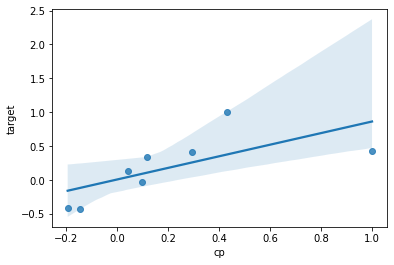

/home/deependra/Desktop/End_to_End_ML_Project/Healthcare_CVD/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


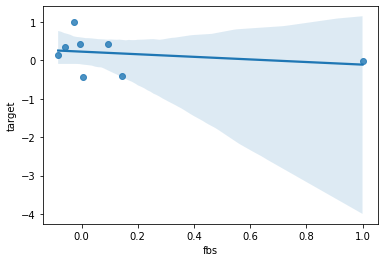

/home/deependra/Desktop/End_to_End_ML_Project/Healthcare_CVD/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


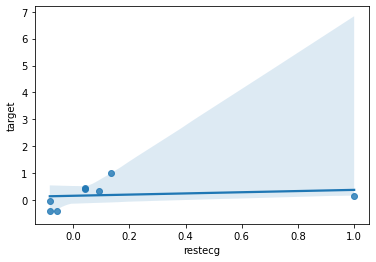

/home/deependra/Desktop/End_to_End_ML_Project/Healthcare_CVD/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


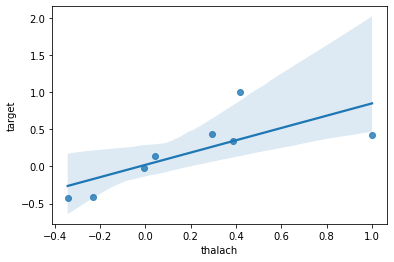

/home/deependra/Desktop/End_to_End_ML_Project/Healthcare_CVD/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


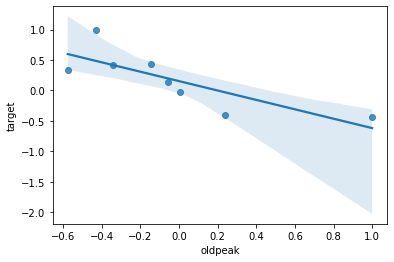

/home/deependra/Desktop/End_to_End_ML_Project/Healthcare_CVD/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


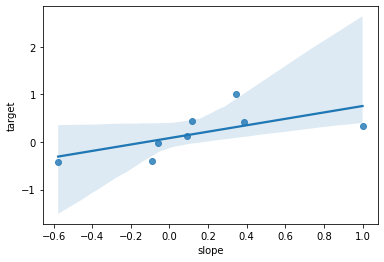

/home/deependra/Desktop/End_to_End_ML_Project/Healthcare_CVD/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


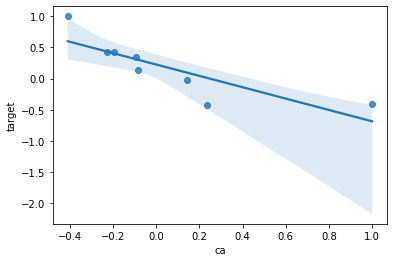

/home/deependra/Desktop/End_to_End_ML_Project/Healthcare_CVD/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


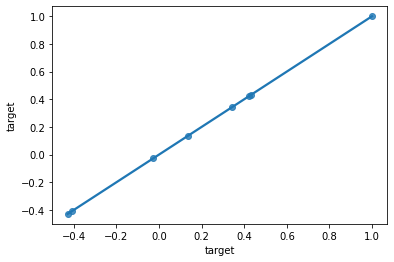

In [27]:
for i in corr.columns:
    sns.regplot(corr[i],corr["target"])
    plt.show()

From the above regression plot, we can see how the others column is related to the occurence of CVD

In [28]:
corr1 = df.corr()

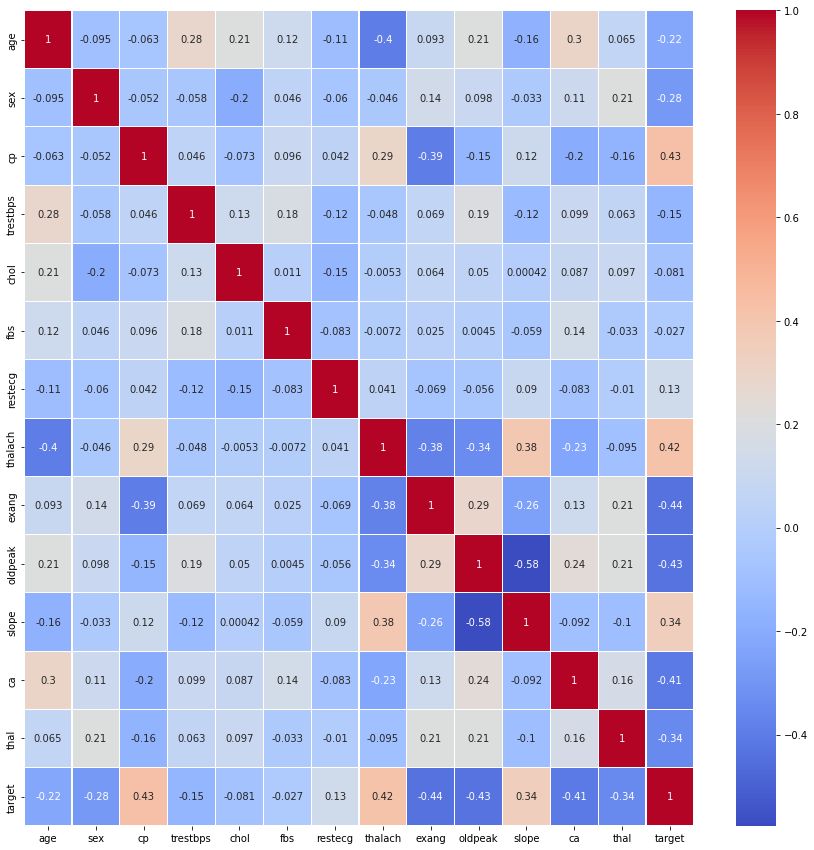

In [29]:
plt.figure(figsize=(15,15))
sns.heatmap(corr1,annot = True, cmap = "coolwarm", linewidths= 0.1)
plt.show()

From heatmap we can see that multicolinearity is not present in the dataset.

#### 2.j. Use a pair plot to understand the relationship between all the given variables

<Figure size 1080x1080 with 0 Axes>

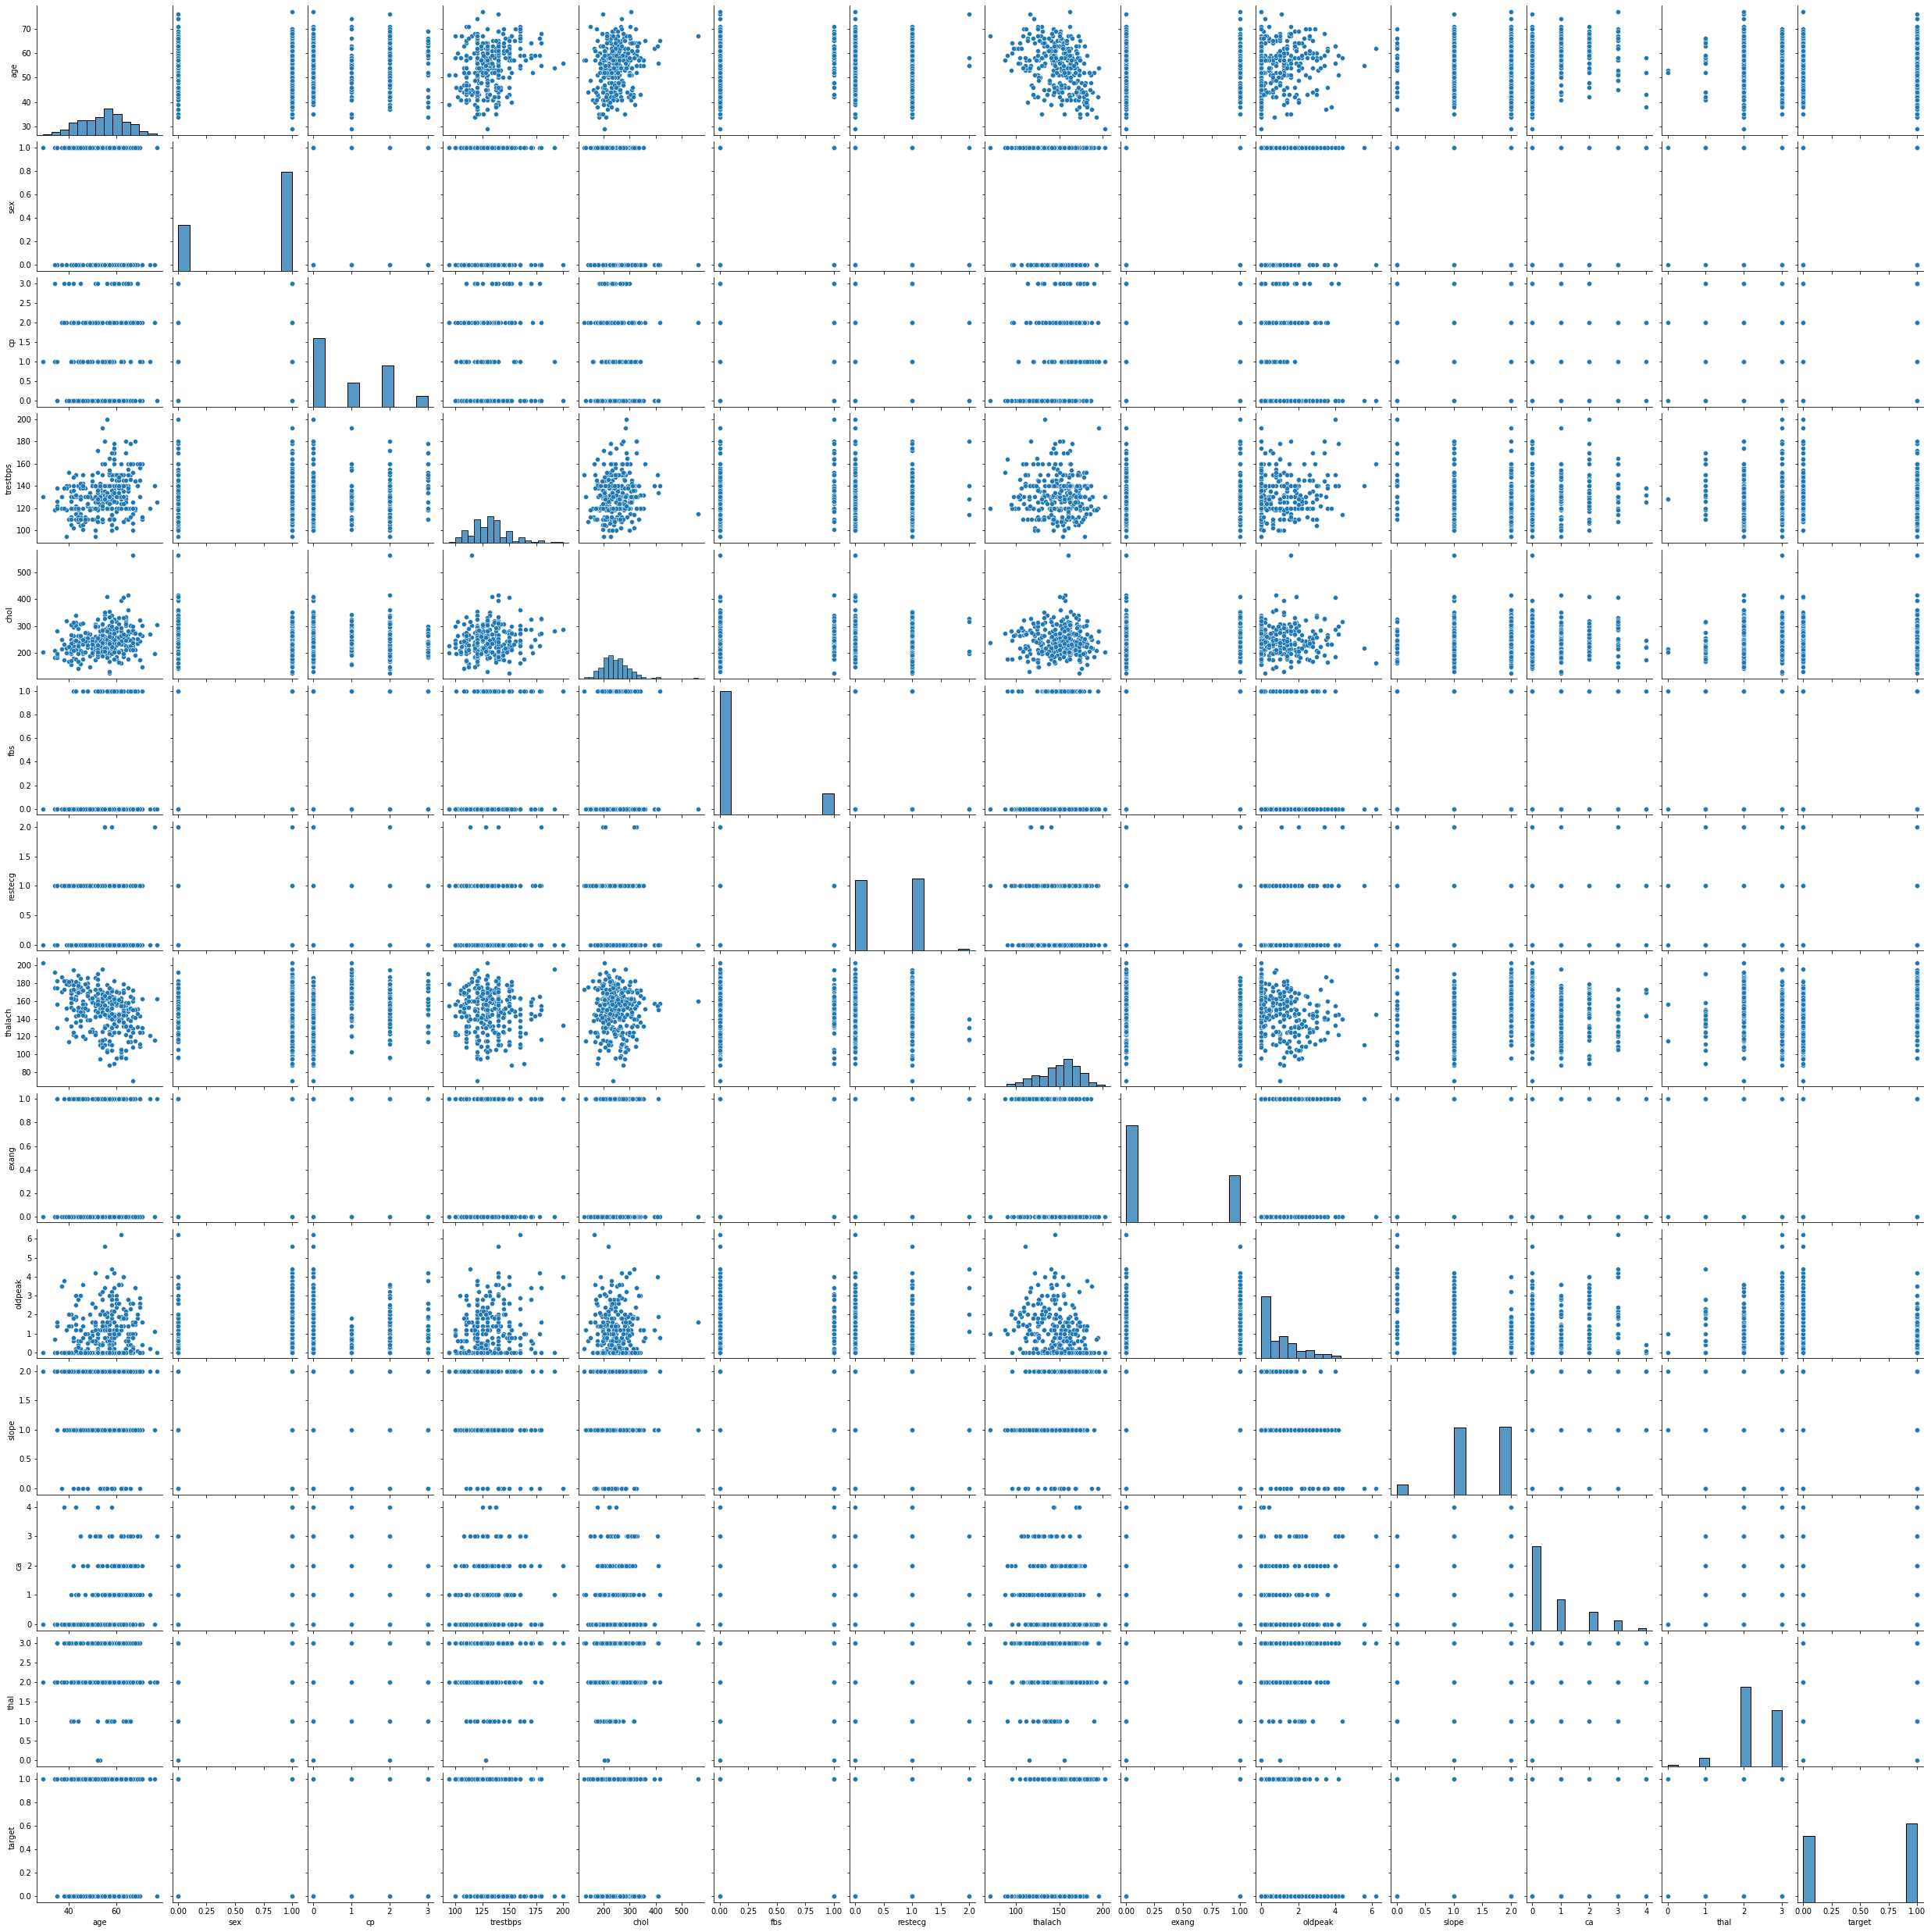

In [30]:
plt.figure(figsize=(15,15))
sns.pairplot(df)
plt.show()

### Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

In [31]:
X = df.iloc[:,:-1]
y= df.iloc[:,-1]

In [32]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42, stratify=y)

In [35]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((226, 13), (76, 13), (226,), (76,))

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[ 1.85396704e-01, -1.49284005e+00, -9.35711071e-01,
         3.94410528e+00,  9.08900806e-01,  2.50805155e+00,
        -1.04970845e+00, -7.41558809e-01,  1.39106611e+00,
         2.40127464e+00, -2.27374991e+00,  1.27789268e+00,
         1.08945027e+00],
       [ 4.01374307e-01,  6.69864127e-01, -9.35711071e-01,
        -3.50677227e-01,  1.15650894e+00, -3.98715888e-01,
        -1.04970845e+00,  9.67648666e-01, -7.18873093e-01,
        -9.04775124e-01,  9.58121031e-01,  1.27789268e+00,
         1.08945027e+00],
       [ 1.69723993e+00,  6.69864127e-01,  1.05929555e+00,
         1.65355461e+00,  5.16854592e-01, -3.98715888e-01,
         8.33101948e-01, -1.68612083e+00,  1.39106611e+00,
         1.49211096e+00, -6.57814439e-01,  2.82017696e-01,
         1.08945027e+00],
       [-1.00248011e+00,  6.69864127e-01, -9.35711071e-01,
         6.22806809e-01,  1.34221504e+00, -3.98715888e-01,
        -1.04970845e+00, -1.11850792e-01,  1.39106611e+00,
        -9.04775124e-01, -6.57814439e

In [39]:
import pickle
scaler_model = pickle.dump(scaler,open("scaler.pkl","wb"))

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
lr = LogisticRegression()

In [42]:
lr.fit(X_train,y_train)

/home/deependra/Desktop/End_to_End_ML_Project/Healthcare_CVD/venv/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [43]:
y_pred_lr = lr.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [45]:
accuracy_score(y_pred_lr,y_test)

0.8157894736842105

In [46]:
precision_score(y_pred_lr,y_test)

0.926829268292683

In [47]:
recall_score(y_pred_lr,y_test)

0.7755102040816326

In [48]:
confusion_matrix(y_pred_lr,y_test)

array([[24,  3],
       [11, 38]])

In [49]:
print(classification_report(y_pred_lr,y_test))

              precision    recall  f1-score   support

           0       0.69      0.89      0.77        27
           1       0.93      0.78      0.84        49

    accuracy                           0.82        76
   macro avg       0.81      0.83      0.81        76
weighted avg       0.84      0.82      0.82        76



In [50]:
probab = lr.predict_proba(X_test)

In [51]:
probab = probab[:,1]

In [52]:
log_auc = roc_auc_score(y_test,probab)

In [53]:
log_auc

0.8564459930313589

In [54]:
fpr,tpr,threshold = roc_curve(y_test,probab)

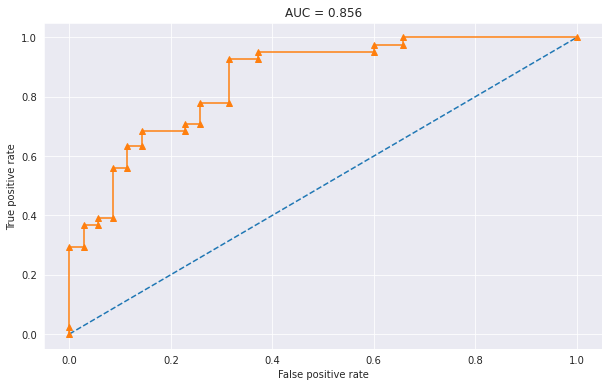

In [55]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='^')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc  =RandomForestClassifier()

In [57]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [58]:
y_pred_rfc = rfc.predict(X_test)

In [59]:
accuracy_score(y_pred_rfc,y_test)

0.7631578947368421

In [60]:
precision_score(y_pred_rfc,y_test)

0.8536585365853658

In [61]:
recall_score(y_pred_rfc,y_test)

0.7446808510638298

In [62]:
confusion_matrix(y_pred_rfc,y_test)

array([[23,  6],
       [12, 35]])

In [63]:
print(classification_report(y_pred_rfc,y_test))

              precision    recall  f1-score   support

           0       0.66      0.79      0.72        29
           1       0.85      0.74      0.80        47

    accuracy                           0.76        76
   macro avg       0.76      0.77      0.76        76
weighted avg       0.78      0.76      0.77        76



In [64]:
prob_rf = rfc.predict_proba(X_test)

In [65]:
prob_rf = prob_rf[:,1]

In [66]:
log_auc_rf = roc_auc_score(y_test,prob_rf)

In [67]:
fpr_rf,tpr_rf,threshold_rf = roc_curve(y_test,prob_rf)

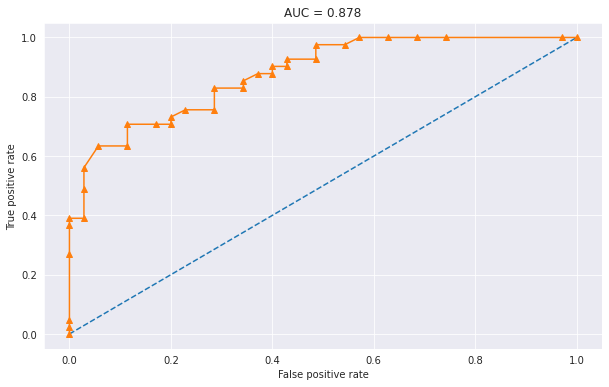

In [68]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_rf, tpr_rf, marker='^')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc_rf,3)}")
plt.show()

In [69]:
print(f"The accuracy score of Logistic Regression model is {accuracy_score(y_pred_lr,y_test)*100} and Random Forest model is {accuracy_score(y_pred_rfc,y_test)*100}")
print(f"The accuracy score of Logistic Regression model is {precision_score(y_pred_lr,y_test)*100} and Random Forest model is {precision_score(y_pred_rfc,y_test)*100}")
print(f"The accuracy score of Logistic Regression model is {recall_score(y_pred_lr,y_test)*100} and Random Forest model is {recall_score(y_pred_rfc,y_test)*100}")

The accuracy score of Logistic Regression model is 81.57894736842105 and Random Forest model is 76.31578947368422
The accuracy score of Logistic Regression model is 92.6829268292683 and Random Forest model is 85.36585365853658
The accuracy score of Logistic Regression model is 77.55102040816327 and Random Forest model is 74.46808510638297


In [70]:
import statsmodels.api as sn

In [71]:
result = sn.OLS(y,X).fit()

In [72]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.774
Model:                            OLS   Adj. R-squared (uncentered):              0.764
Method:                 Least Squares   F-statistic:                              76.22
Date:                Mon, 03 Apr 2023   Prob (F-statistic):                    3.05e-85
Time:                        18:20:34   Log-Likelihood:                         -111.63
No. Observations:                 302   AIC:                                      249.3
Df Residuals:                     289   BIC:                                      297.5
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0035      0.002      1.503      0.134      -0.001       0.008
sex           -0.1706      0.047     -3.652      0.000      -0.263      -0.079
cp             0.1091      0.023      4.812      0.000       0.064       0.154
trestbps      -0.0008      0.001     -0.708      0.480      -0.003       0.001
chol          -0.0001      0.000     -0.254      0.799      -0.001       0.001
fbs            0.0084      0.060      0.139      0.890      -0.110       0.127
restecg        0.0686      0.040      1.728      0.085      -0.010       0.147
thalach        0.0050      0.001      5.605      0.000       0.003       0.007
exang         -0.1202      0.051     -2.350      0.019      -0.221      -0.020
oldpeak       -0.0526      0.023     -2.274      0.024      -0.098      -0.007
slope          0.0887      0.043      2.078      0.039       0.005       0.173
ca            -0.1120      0.023     -4.924      0.000      -0.157      -0.067
thal          -0.1021      0.036     -2.866      0.004      -0.172      -0.032
==============================================================================
Omnibus:                        7.900   Durbin-Watson:                   1.048
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                8.133
Skew:                          -0.401   Prob(JB):                       0.0171
Kurtosis:                       2.935   Cond. No.                         962.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
import pickle
model_LR = pickle.dump(lr,open("healthcare_LR.pkl","wb"))

In [74]:
model_RFC = pickle.dump(rfc,open("healthcare_rfc.pkl","wb"))

In [75]:
df1 = X.to_numpy()

In [76]:
df1[0].reshape(1,-1).shape

(1, 13)

In [78]:
float(lr.predict(df1[0].reshape(1,-1)))

1.0